# **Traveling** **Salesman** **Problem**


In [5]:
# Number of cities
N = 10

city_x = np.random.rand((10))
city_y = np.random.rand((10))

print('The co-ordinates of the 10 cities are:')
for city in zip(city_x, city_y):
    print(city)

The co-ordinates of the 10 cities are:
(0.8559722147714083, 0.7741812784934693)
(0.15474392654954439, 0.6301304359607225)
(0.951305860955707, 0.6980338047050543)
(0.5052214507024487, 0.7335680313898814)
(0.16053977467185598, 0.15090451469904154)
(0.09303616838680928, 0.5676657299278218)
(0.9406672719697003, 0.44891489034282317)
(0.29761822451259634, 0.5237932134056215)
(0.6911957369376315, 0.5689129646285255)
(0.5884123530844566, 0.9868335585630819)


Text(0.5, 1.0, 'Map of cities')

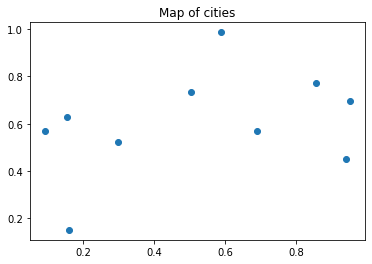

In [6]:
plt.plot(city_x, city_y, 'o')
plt.title('Map of cities')

In [7]:
d = np.zeros((N,N))
# Calculate distance matrix
for i in range(N):
    for j in range(N):
        d[i, j] = np.sqrt((city_x[i] - city_x[j])**2 + (city_y[i] - city_y[j])**2)

print(d);

[[0.         0.71587133 0.12201206 0.35309423 0.93386305 0.79039236
  0.3361123  0.61192594 0.26322304 0.34177371]
 [0.71587133 0.         0.79945093 0.36542281 0.47926097 0.08780482
  0.80654484 0.17810298 0.53993344 0.56152063]
 [0.12201206 0.79945093 0.         0.44749747 0.96159319 0.86811445
  0.24934597 0.67651113 0.29039536 0.46378551]
 [0.35309423 0.36542281 0.44749747 0.         0.67698023 0.44432002
  0.52023117 0.29513484 0.24839027 0.26657861]
 [0.93386305 0.47926097 0.96159319 0.67698023 0.         0.42219267
  0.83511023 0.3972864  0.67551966 0.93906992]
 [0.79039236 0.08780482 0.86811445 0.44432002 0.42219267 0.
  0.85590902 0.2092334  0.59816087 0.64892159]
 [0.3361123  0.80654484 0.24934597 0.52023117 0.83511023 0.85590902
  0.         0.64739388 0.27683133 0.64299302]
 [0.61192594 0.17810298 0.67651113 0.29513484 0.3972864  0.2092334
  0.64739388 0.         0.39615534 0.54677928]
 [0.26322304 0.53993344 0.29039536 0.24839027 0.67551966 0.59816087
  0.27683133 0.396155

In [8]:
# Set parameters for network energy function
#A : controls the impact of connections between the nodes in the same column of the weight matrix.
#B : controls the impact of connections between the nodes in the same row of the weight matrix.
#C : controls the overall level of activation in the network.
#D : controls the input of the connection between b/w  neighboring nodes.

A = 500 #penalize short edges and encourage long edges.
B = 500 #penalize the intersection of edges. 
C = 1000 #encourage the edges to connect to each other in a cycle.
D = 500 #encourage the edges to connect to each other in a cycle.


alpha = 0.0001 #to control the strength of the weigth update during learning

In [9]:
# x-v-value of each node, y-u-input potential, u0-gamma
def hopfield():
    u0 = 0.02
    toend = 0
    udao = np.zeros((N, N))
    ctr = 0
    while toend == 0:
        ctr += 1
        # U initialization
        #v - initial state of the network which will converge towards soln for TSP
        v = np.random.rand(N,N)
        #u - input potential of each node.
        u = np.ones([N, N])*(-u0*np.log(N-1)/2)

        u += u*0.91 
        #increased u by 91% to adjust fir the symmetry b/w input output  in the energy function.
        for _ in range(100000):
            for vx in range(N):
                for vi in range(N):
                    j1, j2, j3, j4 = 0, 0, 0, 0
                    #these are the parameters calculated to update the u of node in the direction that will reduce the energy function.

                    
                    # derivative 1 (sum over columns j!=vi)
                    for j in range(N):
                        if j != vi:
                            j1 += v[vx, j]
                    j1 *= -A

                    # derivative 2 (sum over rows y!=x)
                    for y in range(N):
                        if y != vx:
                            j2 += v[y, vi]
                    j2 *= -B

                    # derivative 3 (overall sum)
                    j3 = np.sum(v)
                    j3 = -C*(j3-N)

                    # derivative 4
                    for y in range(N):
                        if y != vx:
                            if vi == 0:
                                j4 += d[vx, y]*(v[y, vi+1]+v[y, N-1])
                            elif vi == N-1:
                                j4 += d[vx, y]*(v[y, vi-1]+v[y, 0])
                            else:
                                j4 += d[vx, y]*(v[y, vi+1]+v[y, vi-1])
                    j4 *= -D
                    udao[vx, vi] = -u[vx, vi]+j1+j2+j3+j4


            

            # update status and derivatives
             #status of the system is updated by adding the derivative of the energy function with respect to the current status
            u = u + alpha*udao
           

               # calculates the output node value based on the input potential u using a sigmoidal activation function.
            v = (1+np.tanh(u/u0)) / 2
         


            # threshold
            # thresholding step is used to convert the output values from the Hopfield network to binary values.
            for vx in range(N):
                for vi in range(N):
                    if(v[vx, vi] < 0.7):
                        v[vx, vi] = 0
                    if(v[vx, vi] >= 0.7):
                        v[vx, vi]=1
            
        # testing whether solution is legal
        t1, t2, t3 = 0, 0, 0

        # require total of N-nodes with 1 value
        t1=0;
        for vx in range(N):
            for vi in range(N):
                t1+=v[vx, vi]

        # allow only one node in each row equal 1
        t2=0
        for x in range(N):
            for i in range(N-1):
                for j in range(i+1, N):
                    t2+=np.multiply(v[x, i], v[x, j])

        # allow only one node in each column equal 1
        t3=0
        for i in range(N):
            for x in range(N-1):
                for y in range(x+1, N):
                    t3+=np.multiply(v[x, i], v[y, i])

        # stop the loop after getting the valid solution
        if t1 == N and t2 == 0 and t3 == 0:
            toend = 1
        else:
            toend = 0

    return(v, ctr)

In [10]:
def total_distance(v):
  #calculates the total distance of the path obtained by visiting the cities in the order specified by the input binary matrix 
   
    city_x_final = np.zeros((N+1))
    city_y_final = np.zeros((N+1))

    for j in range(N):
        for i in range(N):
            if v[i,j] == 1:
                city_x_final[j] = city_x[i]
                city_y_final[j] = city_y[i]

    city_x_final[N] = city_x_final[0]
    city_y_final[N] = city_y_final[0]

    # calculate the total distance
    td = 0
    for i in range(N-1):
        td += np.sqrt((city_x_final[i] - city_x_final[i+1])**2
                    + (city_y_final[i] - city_y_final[i+1])**2)
    td += np.sqrt((city_x_final[N-1] - city_x_final[0])**2
                + (city_y_final[N-1] - city_y_final[0])**2)
    
    return(td, city_x_final, city_y_final)

In [11]:
v = np.zeros([N,N])

ct = 0

min_dist = 20
best_path = None

for i in range(10):
    v, steps = hopfield()
    td, _, _ = total_distance(v)
    print(f"Epoch {i}: Ran for {steps} steps, total distance {td}")
    if td < min_dist:
        min_dist = td
        best_path = v
print(min_dist)
print(best_path)
#If the total distance is less than the previous minimum distance, it updates the minimum distance and stores the binary matrix as the best path.

Epoch 0: Ran for 3 steps, total distance 3.377877595726626
Epoch 1: Ran for 6 steps, total distance 3.4630645633135866


KeyboardInterrupt: ignored

In [12]:
#search for 1 column wise in  the best path matrix
def get_route(v):
    route = ""
    for j in range(v.shape[1]):
        route += str(np.argmax(v[:, j])) + ' -> '
        #For each column, it finds the row with the highest value (which will be 1 in the case of the Hopfield network), using the np.argmax() function.
#after the loop has finished, it appends the index of the first city to the route string to complete the tour.

    return (route + str(np.argmax(v[:, 0])))

In [13]:
print(get_route(best_path))

2 -> 6 -> 0 -> 9 -> 7 -> 1 -> 5 -> 4 -> 3 -> 8 -> 2


In [14]:
def get_route_indices(v):
    indices = []
    for j in range(v.shape[1]):
        indices.append(np.argmax(v[:, j]))
    indices.append(np.argmax(v[:, 0]))
    return indices

In [15]:
indices = get_route_indices(best_path)
print(indices)

[2, 6, 0, 9, 7, 1, 5, 4, 3, 8, 2]


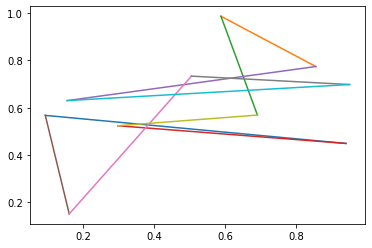

In [16]:
# indices = get_route_indices(best_path)
for i in indices[1:]:
    plt.plot([city_x[i], city_x[i-1]], [city_y[i], city_y[i-1]], '-')
plt.show()